**Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#Import Libaries.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Getting data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Checking the shape of data.
data.shape

(1460, 81)

In [6]:
null_data = round(data.isnull().mean()*100,2).sort_values(ascending=False)

In [7]:
#Getting all the data which has null more then 5%
null_column = null_data[null_data > 5].index

In [8]:
#Dropping all the columns with null more then 5%
data.drop(columns= null_column, inplace=True)

In [9]:
round(data.isnull().mean()*100,2).sort_values(ascending=False)

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtCond        2.53
BsmtFinType1    2.53
BsmtQual        2.53
                ... 
BsmtFinSF1      0.00
BsmtFinSF2      0.00
MSSubClass      0.00
TotalBsmtSF     0.00
SalePrice       0.00
Length: 70, dtype: float64

In [10]:
#Checking which column still have nulls.
null_data = round(data.isnull().mean()*100,2)
null_data[null_data != 0].index

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical'],
      dtype='object')

In [11]:
#Removing rows which do not have the data for following columns(as the no of nulls are very less so we can remove the row itself).
data = data[~data['MasVnrType'].isnull()]
data = data[~data['BsmtQual'].isnull()]
data = data[~data['BsmtExposure'].isnull()]
data = data[~data['BsmtFinType2'].isnull()]
data = data[~data['Electrical'].isnull()]

In [12]:
#Checking for nulls(as all the cleaning is done so we should not have any nulls now).
round(data.isnull().mean()*100,2).sort_values(ascending=False)

Id              0.0
GrLivArea       0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
               ... 
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
SalePrice       0.0
Length: 70, dtype: float64

In [13]:
#Checking the shape of data.
data.shape

(1412, 70)

In [14]:
#checking for duplicate data using Id.
data[data.duplicated(subset='Id')]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Inferance:**
- No duplicate present

In [15]:
#Removing id column as it will not help in predection.
data.drop(columns='Id',inplace=True)

In [16]:
# Looking into all the catogrical columns.
for i in data.columns:
    if data[i].dtype == 'O':
        print('*************** ',i,' ***************')
        print(data[i].value_counts())
        print('-----------------------------------------------------------')

***************  MSZoning  ***************
RL         1111
RM          214
FV           62
RH           15
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------------------------
***************  Street  ***************
Pave    1406
Grvl       6
Name: Street, dtype: int64
-----------------------------------------------------------
***************  LotShape  ***************
Reg    886
IR1    476
IR2     40
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------------------------
***************  LandContour  ***************
Lvl    1267
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64
-----------------------------------------------------------
***************  Utilities  ***************
AllPub    1411
NoSeWa       1
Name: Utilities, dtype: int64
-----------------------------------------------------------
***************  LotConfig  ***************
Inside     1015
Corner      256
CulDSac      91
FR2          46


In [17]:
#Creating dummy variables for all the catogrical variable.
for i in data.columns:
    if data[i].dtype == 'O':
        dummy = pd.get_dummies(data[i], prefix=i, prefix_sep='_', drop_first=True)
        data = pd.concat([data,dummy], axis=1)
        data.drop(columns=i, inplace=True)

In [18]:
data.shape

(1412, 212)

In [19]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

In [20]:
#Creating dependent and independent variable
y = data.pop('SalePrice')
x = data

In [21]:
#Splitting data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [22]:
x_train.shape

(988, 211)

In [23]:
#Standard Scaling
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [24]:
x_train_scale.shape

(988, 211)

# PCA

In [25]:
pca = PCA(0.95,random_state=100)

In [26]:
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

In [27]:
#Checking if we are getting varaince upto 95%
cum = np.cumsum(pca.explained_variance_ratio_)
cum

array([0.06798706, 0.10285266, 0.12978933, 0.152477  , 0.17314207,
       0.19091066, 0.20730724, 0.22271893, 0.23681822, 0.25064411,
       0.26424363, 0.27714556, 0.28972187, 0.30194912, 0.31377046,
       0.32546648, 0.33698262, 0.34805214, 0.35882743, 0.3695333 ,
       0.37991198, 0.3901612 , 0.40023667, 0.41002645, 0.41976283,
       0.42931238, 0.43876664, 0.44783399, 0.45684484, 0.46564906,
       0.47421631, 0.48260856, 0.49091568, 0.49911911, 0.50714817,
       0.51504923, 0.52288924, 0.53057556, 0.53820902, 0.54565724,
       0.55308013, 0.56036072, 0.5675403 , 0.5745894 , 0.5815538 ,
       0.58843098, 0.59516145, 0.60185063, 0.60847285, 0.61497774,
       0.62140236, 0.62769428, 0.63395029, 0.64008814, 0.64616031,
       0.65216765, 0.65813393, 0.66400805, 0.66983136, 0.67562538,
       0.68133284, 0.68695879, 0.69248197, 0.69796565, 0.70341688,
       0.70882996, 0.71413936, 0.71937771, 0.72456015, 0.72969409,
       0.73476198, 0.73976185, 0.74472725, 0.74966588, 0.75453

<AxesSubplot:>

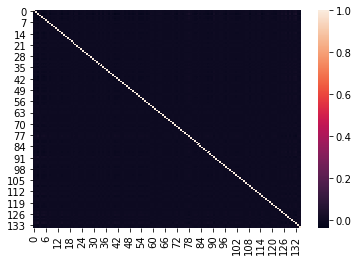

In [28]:
#Checking the correlation(there should not be any).
sns.heatmap(np.corrcoef(pca.components_))

In [29]:
x_train_pca.shape

(988, 135)

# First model using Principle Components

In [30]:
#Performing linear regression using Principle components.
lr1 = LinearRegression()
lr1.fit(x_train_pca,y_train)
y_train_pred = lr1.predict(x_train_pca)
y_test_pred = lr1.predict(x_test_pca)

In [31]:
r2_score(y_train_pred,y_train)

0.9118652974863789

In [32]:
r2_score(y_test_pred,y_test)

0.7030740171117433

**Inferance:** The performance is better on train data then on test data so its not a best model.

**Resedual Analysis**

In [33]:
err = y_train-y_train_pred

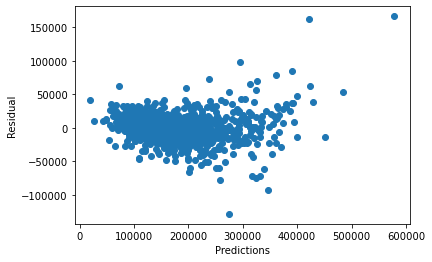

In [34]:
#Checking for any pattern.
plt.scatter(y_train_pred,err)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

**Inferance:**
There is no pattern 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

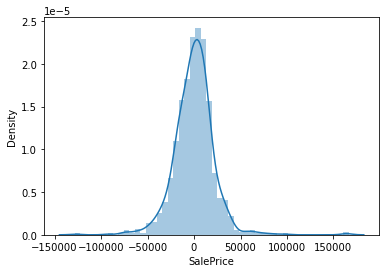

In [35]:
#Checking if error is normally distributed.
sns.distplot(err)

**Inferance:**
Error is normally distributed.


# Ridge Regression

In [36]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for i in alpha:
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(x_train_scale, y_train)
    print()
    print('------------------- alpha:',i,' ------------------')
    

    #Computing the r2 score
    y_train_ridge_pred = ridgereg.predict(x_train_scale)
    print("Train r2 score = " + str(r2_score(y_train, y_train_ridge_pred)))
    y_test_ridge_pred = ridgereg.predict(x_test_scale)
    print("Test r2 score = " + str(r2_score(y_test, y_test_ridge_pred))) 


------------------- alpha: 0.001  ------------------
Train r2 score = 0.9416204204254189
Test r2 score = 0.6985140157283554

------------------- alpha: 0.01  ------------------
Train r2 score = 0.9416204177897806
Test r2 score = 0.6985226790642346

------------------- alpha: 0.1  ------------------
Train r2 score = 0.9416201779164625
Test r2 score = 0.6986090146804244

------------------- alpha: 1  ------------------
Train r2 score = 0.9416052348869395
Test r2 score = 0.6994454550754199

------------------- alpha: 10  ------------------
Train r2 score = 0.9410988297443086
Test r2 score = 0.7058010892169421

------------------- alpha: 100  ------------------
Train r2 score = 0.9348777333152211
Test r2 score = 0.7276407948507946

------------------- alpha: 1000  ------------------
Train r2 score = 0.8936825632682485
Test r2 score = 0.7415066446473919

------------------- alpha: 10000  ------------------
Train r2 score = 0.6465438167194225
Test r2 score = 0.5608650233765451


**Inferance:** 1000 is the best alpha value as it gives good result in both test and train dataset

In [37]:
ridgereg = Ridge(alpha = 1000)
ridgereg.fit(x_train_scale, y_train)
y_train_ridge_pred = ridgereg.predict(x_train_scale)
y_test_ridge_pred = ridgereg.predict(x_test_scale)

**Resedual Analysis**

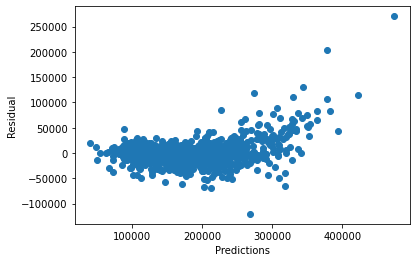

In [38]:
#Checking for any pattern.
err = y_train-y_train_ridge_pred
plt.scatter(y_train_ridge_pred,err)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

**Inferance:** There is no pattern.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

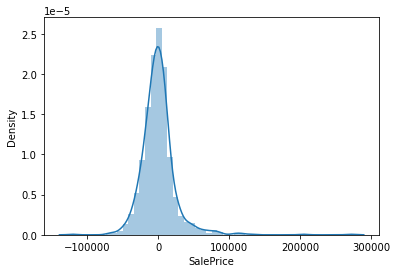

In [39]:
#Checking if error is normally distributed.
sns.distplot(err)

**Inferance:** Error is normally distributed.

# Lasso Regression

In [40]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in alpha:
    lassoreg = Lasso(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    lassoreg.fit(x_train_scale, y_train)
    print()
    print('------------------- alpha:',i,' ------------------')
    

    #Computing the r2 score
    y_train_lasso_pred = lassoreg.predict(x_train_scale)
    print("Train r2 score = " + str(r2_score(y_train, y_train_lasso_pred)))
    y_test_lasso_pred = lassoreg.predict(x_test_scale)
    print("Test r2 score = " + str(r2_score(y_test, y_test_lasso_pred)))


------------------- alpha: 0.001  ------------------
Train r2 score = 0.9416197941956884
Test r2 score = 0.6963961017810063

------------------- alpha: 0.01  ------------------
Train r2 score = 0.9416197915815747
Test r2 score = 0.6964405152653896

------------------- alpha: 0.1  ------------------
Train r2 score = 0.9416197603734088
Test r2 score = 0.6968840439705528

------------------- alpha: 1  ------------------
Train r2 score = 0.9416189396323671
Test r2 score = 0.700640566140822

------------------- alpha: 10  ------------------
Train r2 score = 0.9415701195025699
Test r2 score = 0.7015027578865279

------------------- alpha: 100  ------------------
Train r2 score = 0.9396964000226744
Test r2 score = 0.7069162183930843

------------------- alpha: 1000  ------------------
Train r2 score = 0.9185969057576235
Test r2 score = 0.7100964922673286

------------------- alpha: 10000  ------------------
Train r2 score = 0.8010088465391983
Test r2 score = 0.6602153203270325


**Inferance:** 1000 is the best alpha value as it gives good result in both test and train dataset

In [41]:
lassoreg = Lasso(alpha = 1000)
lassoreg.fit(x_train_scale, y_train)
y_train_lasso_pred = lassoreg.predict(x_train_scale)
y_test_lasso_pred = lassoreg.predict(x_test_scale)

**Resedual Analysis**

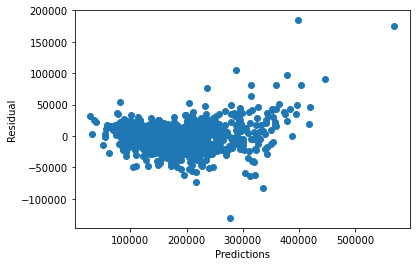

In [42]:
#Checking for any pattern.
err = y_train-y_train_lasso_pred
plt.scatter(y_train_lasso_pred,err)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

**Inferance:** There is no pattern.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

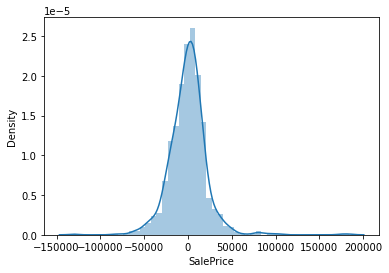

In [43]:
#Checking if error is normally distributed.
sns.distplot(err)

**Inferance:** Error is normally distributed.

# Selecting Model

**After analysing linear regression(using PCA), Ridge regression, Lasso Regression I can see Ridge regression with alpha = 1000 is the best model we can select.**

**SUMMARY:**
- Linear Regression using PCA gives r2_score of 0.91 and 0.70 on train and test dataset.
- Ridge Regression best result was for alpha = 1000 with r2_score of 0.89 and 0.74 on train and test dataset.
- Lasso Regression best result was for alpha = 1000 with r2_score of 0.91 and 0.71 on train and test dataset.
- All these model sucessfully pass the Residual Analysis.
- After all the analysis I came to conclusion that Ridge Regression is the best performing model(alpha = 1000).

In [44]:
#Getting all the features and their cofficient values
columns_imp = pd.DataFrame(ridgereg.coef_, index=x_train.columns)
columns_imp = columns_imp.sort_values(by=0,ascending=False)

In [45]:
#Significant variable that is affecting the price
print("Top 10 variables which are positevely affecting the price")
print(columns_imp.head(10))
print()
print("Top 10 variables which are negetively affecting the price")
print(columns_imp.tail(10))

Top 10 variables which are positevely affecting the price
                                0
GrLivArea             7366.407050
OverallQual           7063.087005
TotalBsmtSF           5535.518035
1stFlrSF              5454.358361
TotRmsAbvGrd          4505.714054
Neighborhood_NridgHt  4430.586335
BsmtFinSF1            4203.062280
2ndFlrSF              3944.873101
GarageArea            3812.593440
Fireplaces            3721.042174

Top 10 variables which are negetively affecting the price
                           0
BldgType_TwnhsE -1597.393642
BsmtQual_Gd     -1637.585489
BldgType_Twnhs  -1659.098202
KitchenAbvGr    -1661.928082
RoofStyle_Gable -1750.097524
MSSubClass      -1920.893493
BsmtExposure_No -2285.730778
BsmtQual_TA     -2323.296414
KitchenQual_TA  -2830.591627
ExterQual_TA    -3210.397976


# Subjective Questions 

In [46]:
#Question 1
#Cecking the most important predictor value after we double the alpha value for both ridge and lasso 
#------------Ridge------------
ridgereg = Ridge(alpha = 2000)
ridgereg.fit(x_train_scale, y_train)
y_train_ridge_pred = ridgereg.predict(x_train_scale)
y_test_ridge_pred = ridgereg.predict(x_test_scale)
print('Train: ',r2_score(y_train, y_train_ridge_pred),', Test: ',r2_score(y_test, y_test_ridge_pred))

#-----------Lasso-------------
lassoreg = Lasso(alpha = 2000)
lassoreg.fit(x_train_scale, y_train)
y_train_lasso_pred = lassoreg.predict(x_train_scale)
y_test_lasso_pred = lassoreg.predict(x_test_scale)
print('Train: ',r2_score(y_train, y_train_lasso_pred),', Test: ',r2_score(y_test, y_test_lasso_pred))

Train:  0.8573175065871471 , Test:  0.7249341830874221
Train:  0.896276766430692 , Test:  0.7000733953962781


In [47]:
#Getting all the features and their cofficient values for ridge after implementing changes
columns_imp = pd.DataFrame(ridgereg.coef_, index=x_train.columns)
columns_imp = columns_imp.sort_values(by=0,ascending=False)
#Significant variable that is affecting the price
print("Top 10 variables which are positevely affecting the price")
print(columns_imp.head(10))
print()
print("Top 10 variables which are negetively affecting the price")
print(columns_imp.tail(10))

Top 10 variables which are positevely affecting the price
                                0
GrLivArea             6017.600666
OverallQual           5777.449780
1stFlrSF              4699.460133
TotalBsmtSF           4677.909486
TotRmsAbvGrd          4029.923157
GarageArea            3649.351249
Neighborhood_NridgHt  3543.880240
Fireplaces            3482.377014
BsmtFinSF1            3385.058685
GarageCars            3343.688162

Top 10 variables which are negetively affecting the price
                             0
BldgType_Twnhs    -1263.599802
Foundation_CBlock -1270.782288
MSSubClass        -1370.940823
MSZoning_RM       -1393.943054
HeatingQC_TA      -1426.277826
RoofStyle_Gable   -1740.018777
BsmtExposure_No   -1924.110411
BsmtQual_TA       -2049.773984
KitchenQual_TA    -2539.939794
ExterQual_TA      -2923.308792


In [48]:
#Getting all the features and their cofficient values for lasso after implementing changes
columns_imp = pd.DataFrame(lassoreg.coef_, index=x_train.columns)
columns_imp = columns_imp.sort_values(by=0,ascending=False)
#Significant variable that is affecting the price
print("Top 10 variables which are positevely affecting the price")
print(columns_imp.head(10))
print()
print("Top 10 variables which are negetively affecting the price")
print(columns_imp.tail(10))

Top 10 variables which are positevely affecting the price
                                 0
GrLivArea             27640.775452
OverallQual           17734.998293
BsmtFinSF1             7773.675742
TotalBsmtSF            6877.743240
Neighborhood_NridgHt   6793.013094
YearBuilt              4756.864325
SaleType_New           4746.883002
GarageArea             4387.071793
LotArea                4143.865137
YearRemodAdd           4141.961965

Top 10 variables which are negetively affecting the price
                               0
Exterior1st_HdBoard   -47.198401
BedroomAbvGr         -120.335655
MSZoning_RM          -422.697113
Heating_OthW         -525.938500
Functional_Sev       -526.891449
KitchenQual_TA       -551.196140
BsmtExposure_No     -2034.626223
KitchenAbvGr        -2485.226267
ExterQual_TA        -2525.002307
MSSubClass          -4570.874367


**Question 3**

In [49]:
#Dropping top 5 features we got from lasso regression
x_train_dropped = x_train.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','TotalBsmtSF','Neighborhood_NridgHt'])
x_test_dropped = x_test.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','TotalBsmtSF','Neighborhood_NridgHt'])

In [50]:
#scale variable
scale = StandardScaler()
x_train_dropped_scale = scale.fit_transform(x_train_dropped)
x_test_dropped_scale = scale.transform(x_test_dropped)


In [51]:
#Lasso Regression
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
for i in alpha:
    lassoreg = Lasso(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    lassoreg.fit(x_train_dropped_scale, y_train)
    print()
    print('------------------- alpha:',i,' ------------------')
    

    #Computing the r2 score
    y_train_lasso_pred = lassoreg.predict(x_train_dropped_scale)
    print("Train r2 score = " + str(r2_score(y_train, y_train_lasso_pred)))
    y_test_lasso_pred = lassoreg.predict(x_test_dropped_scale)
    print("Test r2 score = " + str(r2_score(y_test, y_test_lasso_pred)))


------------------- alpha: 0.001  ------------------
Train r2 score = 0.9351773915959897
Test r2 score = 0.7330907169288355

------------------- alpha: 0.01  ------------------
Train r2 score = 0.9351773724230421
Test r2 score = 0.7331275328445361

------------------- alpha: 0.1  ------------------
Train r2 score = 0.9351771699633328
Test r2 score = 0.7334947612783487

------------------- alpha: 1  ------------------
Train r2 score = 0.9351740770127841
Test r2 score = 0.7342219483516531

------------------- alpha: 10  ------------------
Train r2 score = 0.9350983147627369
Test r2 score = 0.7337100146003761

------------------- alpha: 100  ------------------
Train r2 score = 0.9330880820403566
Test r2 score = 0.7319179886214806

------------------- alpha: 1000  ------------------
Train r2 score = 0.9087727891164337
Test r2 score = 0.7350829516513311

------------------- alpha: 10000  ------------------
Train r2 score = 0.7425103179045371
Test r2 score = 0.6325371981502501


In [52]:
lassoreg = Lasso(alpha = 1000)
lassoreg.fit(x_train_dropped_scale, y_train)
y_train_lasso_pred = lassoreg.predict(x_train_dropped_scale)
y_test_lasso_pred = lassoreg.predict(x_test_dropped_scale)

In [53]:
#Getting all the features and their cofficient values for lasso after implementing changes
columns_imp = pd.DataFrame(lassoreg.coef_, index=x_train_dropped.columns)
columns_imp = columns_imp.sort_values(by=0,ascending=False)
#Significant variable that is affecting the price
print("Top 10 variables which are positevely affecting the price")
print(columns_imp.head(10))
print()
print("Top 10 variables which are negetively affecting the price")
print(columns_imp.tail(10))

Top 10 variables which are positevely affecting the price
                                 0
1stFlrSF              27672.136196
2ndFlrSF              25456.128610
YearBuilt             10324.714914
GarageArea             6005.439996
LotArea                5677.199346
OverallCond            5465.214560
SaleType_New           4946.640258
Neighborhood_StoneBr   4768.114400
BsmtExposure_Gd        4692.735818
BsmtFinType1_GLQ       4463.451443

Top 10 variables which are negetively affecting the price
                            0
BsmtExposure_No  -2067.423729
KitchenQual_Fa   -2206.343206
LandSlope_Sev    -2216.035181
KitchenAbvGr     -3771.394789
MSSubClass       -4824.318111
ExterQual_TA     -5440.088932
BsmtQual_TA      -6672.602316
BsmtQual_Gd      -7126.872678
KitchenQual_TA  -10785.221220
KitchenQual_Gd  -11764.568993


**ANSWER** : Top 5 features now are ['1stFlrSF','2ndFlrSF','YearBuilt','GarageArea','LotArea']